In [1]:
%matplotlib inline
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt
import seaborn
#import pandas as pd
#from scipy.optimize import curve_fit
#import scipy.integrate as scint

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [12]:
size=100
staseis_step=5
u_h_max=5.
u_L=50.
bus_rate = 20.

In [3]:
x = np.arange(0,size,1)
u_h = np.ones(x.size)
u_h = rnd.rand(x.size)*u_h_max
u_l = np.ones(x.size)*u_L
s = np.zeros(x.size)
s[x[staseis_step::staseis_step]]=1

$$t(x)=\int _0 ^x \frac{dx'}{u(x')}=\sum \frac{x_i - x_{i-1}}{u(x_i)}$$

In [4]:
def eta(index,speed=u_h):
    ss=(x[1]-x[0])/speed[1]
    for i in range(1,index):
        ss=ss+(x[i]-x[i-1])/speed[i]
    return ss
etav=np.vectorize(eta,excluded=['speed'])

In [5]:
walk=etav(x,speed=u_h)

In [6]:
bus_times=np.cumsum(rnd.poisson(15,20))

In [423]:
#plt.figure(figsize=(15,10))
mh=[] #Here we save the mean value at every bus rate
bus_rates=np.arange(10,100,2) #these vector has evey bus rate
for bus_rate in bus_rates:
    times =[] #here we save the arrival times for every bus rate
    for i in range(20): 
        u_h = rnd.rand(x.size)*u_h_max #random speed of a human
        walk=etav(x,speed=u_h) #arrival time at every point t(x)
        bus_times=np.cumsum(rnd.poisson(bus_rate,np.int(walk[-1]/bus_rate))) #a vector with all bus starting times
        for bus_start in bus_times:
            arrival = (etav(x,speed=u_l)+bus_start)*s #arrival time at every point t(x) for the bus (only for stops)
            bus = (etav(x,speed=u_l)+bus_start) #arrival time at every point t(x) for the bus 
            a=np.logical_and(np.abs(walk-arrival)<2,arrival<>0) #does a human met a bus at a stop?
            if a.any():
                x_meet=np.where(a==True)[0][0] #the x_meet point where a human met the bus
                walk[x_meet:]=bus[x_meet:] #the human t(x) is the same as the bus for x>x_meet
            #plt.plot(x,arrival,'.')
        times.append(walk[-1]) #save the arrival time at the end
        #plt.plot(x,walk)
    mh.append(np.median(times)) #save the mean arrival time at the end

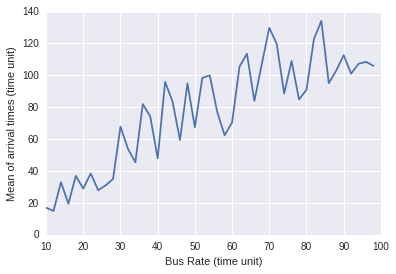

In [424]:
plt.xlabel('Bus Rate (time unit)')
plt.ylabel('Mean of arrival times (time unit)')
plt.plot(bus_rates,mh)

In [14]:
u_h = rnd.rand(x.size)*u_h_max #random speed of a human

In [32]:
def arrival_time(x,u_h,bus_rate):
    walk=etav(x,speed=u_h) #arrival time at every point t(x)
    bus_times=np.cumsum(rnd.poisson(bus_rate,np.int(walk[-1]/bus_rate))) #a vector with all bus starting times
    for bus_start in bus_times:
        arrival = (etav(x,speed=u_l)+bus_start)*s #arrival time at every point t(x) for the bus (only for stops)
        bus = (etav(x,speed=u_l)+bus_start) #arrival time at every point t(x) for the bus 
        a=np.logical_and(np.abs(walk-arrival)<2,arrival<>0) #does a human met a bus at a stop?
        if a.any():
            x_meet=np.where(a==True)[0][0] #the x_meet point where a human met the bus
            walk[x_meet:]=bus[x_meet:] #the human t(x) is the same as the bus for x>x_meet
    return walk

def mean_arrival_time(N,u_h,x=x,bus_rate=bus_rate):
    at=[]
    for i in range(N):
        w=arrival_time(x,u_h,bus_rate)
        at.append(w[-1])
        #plt.plot(x,w)
    return np.mean(at)

75.529135619
36.98
128.98
59.1058798626
88.8279538249


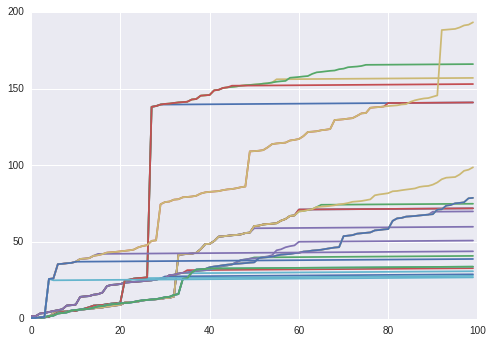

In [25]:
bus_rate=33.
for n in range(5):
    u_h = rnd.rand(x.size)*u_h_max
    at=[]
    for i in range(5):
        w=arrival_time(x,u_h,bus_rate)
        at.append(w[-1])
        plt.plot(x,w)
    print np.mean(at)

In [28]:
chrom1=rnd.rand(x.size)*u_h_max
chrom2=rnd.rand(x.size)*u_h_max

In [62]:
def fitfunction(chrom,N=10):
    return mean_arrival_time(N,chrom1)**(-2)
fitfunction =np.vectorize(fitfunction)

In [36]:
fitfunction(chrom1)

0.00011274771639083314

In [59]:
cut=70
p=0.05
genes_N=10
genes=[]
for i in range(genes_N):
    aa=np.concatenate((chrom1[:cut],chrom2[cut:]))
    bb=np.concatenate((chrom2[:cut],chrom1[cut:]))
    if (rnd.rand()<p):
        aa[rnd.randint(x.size)]=rnd.rand()*u_h_max
    if (rnd.rand()<p):
        bb[rnd.randint(x.size)]=rnd.rand()*u_h_max
    genes.append(aa)
    genes.append(bb)

In [63]:
fitfunction(genes)

KeyboardInterrupt: 